In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# **Задача №1**

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

* Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны.
* Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [4]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


**Проверка** на U образную кривую

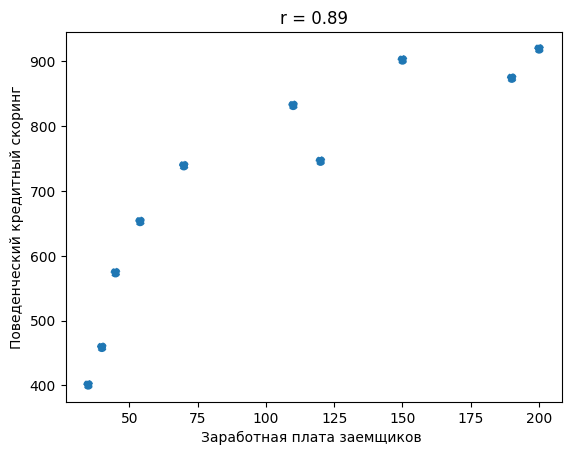

In [7]:
plt.scatter(zp, ks)
plt.title('r = 0.89')
plt.xlabel('Заработная плата заемщиков ')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()


Найдем ковариацию по теоретической формуле

$$cov_(xy)=M(XY)-M(X) * M(Y)$$

In [9]:
cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
cov

9157.839999999997

In [10]:
np.cov(zp, ks, ddof=0)


array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Значение по формуле и по numpy **РАВНЫ.**

Найдем **Коэффициент корреляции Пирсона**

$$r= \frac{cov_(xy)}{σ_x * σ_y}$$

In [12]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [13]:
np.cov(zp, ks, ddof = 0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [14]:
np.std(zp, ddof=0)


59.115480206118605

In [15]:
np.std(ks, ddof=0)


174.55340157098058

In [16]:
9157.84 / (59.115480206118605 * 174.55340157098058)


0.8874900920739162

По графику, а так же в результате анализа коеффициентов корреляции можем сделать вывод о сильной прямой ленейной зависимости.

При **увеличении** заработной платы заемщиков **увеличивается** значения их поведенческого кредитного скоринга.

Коэффициент корреляции Пирсона = **0.89.**

# **Задача №2**

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ **распределен нормально**.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

**Решение:** воспользуемся формулой:

$$\overline{x} ± t_\frac{a}{2} * \frac{σ}{\sqrt{n}}$$

Тест проведем **двухстроний** 

In [17]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [18]:
np.mean(iq)  # Среднее арифметиическое

118.1

In [23]:
disp = round(np.var(iq, ddof=1), 2)
disp


111.21

In [21]:
t_tabular = stats.t.ppf(0.975, len(iq) - 1)
t_tabular


2.2621571627409915

In [25]:
t_left = round(118.1 - t_tabular *
                    np.sqrt(disp/len(iq)), 2)
t_right = round(118.1 + t_tabular *
                     np.sqrt(disp/len(iq)), 2)
print(f"Доверительный интервал [{t_left} ; {t_right}]")


Доверительный интервал [110.56 ; 125.64]


**Ответ:** C вероятностью 95% IQ студентов, обучающихся в местных технических вузах попадет в доверительный интервал [110.56 ; 125.64] и захватит истинное математическое ожидание.

# **Задача №3**

Известно, что рост футболистов в сборной распределен **нормально** с дисперсией генеральной совокупности, **D = 25 кв.см**. Объем выборки равен **n = 27**, **среднее выборочное составляет 174.2**. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

**Решение:** 

- известна σ генеральной совокупности

воспользуемся формулой:

$$\overline{x} ± z_\frac{a}{2} * \frac{σ}{\sqrt{n}}$$

$$\overline{x} = 174.2, D = 25, n = 27, a = 5$$

$$z_\frac{a}{2} = 5/2 = 2.5, по таблице = 1,96 $$

$$174.2 ± 1.96 * \frac{\sqrt{25}}{\sqrt{27}}$$

In [26]:
174.2 + 1.96 * ((25**0.5)/27**0.5)


176.08601087935276

In [27]:
174.2 - 1.96 * ((25**0.5)/27**0.5)


172.31398912064722

**Ответ:**

C вероятностью 95% рост футболистов в сборной попадет в доверительный интервал **[172.31; 176.08]** и захватит истинное математическое ожидание.